<a href="https://colab.research.google.com/github/gurman3911/Fluid-stock-prediction-model/blob/main/Stock%20prediction%20model%20for%20fluid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the newer version of out stock prediction model that we created for previous version. Here we are going to make a coplex architecture model on LSTM RNN tensors and predict the price of NSE Nifty 50 Stock**
the given dataset was provided from the company Fluid AI and project is for round1 of the applicaiton.

In [ ]:
#importing concerned libraries for data pre-processing
import pandas as pd
import numpy as np
from keras.layers import Dense , Dropout , LSTM , Input ,concatenate
from keras.models import Sequential , Model , save_model
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
#upload the test and trian file and concatinat them for simplifying algorithem 
stock_data_train = pd.read_csv(r"C:\Users\91623\OneDrive\Desktop\project_college\company\NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv")
stock_data_test = pd.read_csv(r"C:\Users\91623\OneDrive\Desktop\project_college\company\NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv")
print(len(stock_data_test))
#concatenation of the dataset
stock_data = pd.concat([stock_data_train,stock_data_test],axis=0)

23


In [ ]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
stock_data.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
1474,2021-12-23,17066.800781,17118.650391,17015.550781,17072.599609,17072.599609,197000.0
1475,2021-12-24,17149.500000,17155.599609,16909.599609,17003.750000,17003.750000,182600.0
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0
1480,2021-12-31,17244.500000,17400.800781,17238.500000,17354.050781,17354.050781,167000.0
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500.0
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400.0
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500.0


In [ ]:
test_data = stock_data

In [ ]:
test_data = test_data.reset_index()
test_data.drop('Date',axis = 'columns',inplace = True)

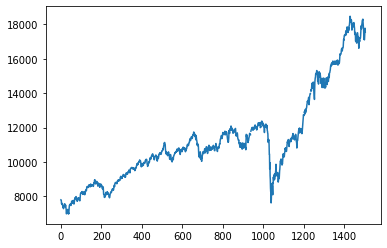

In [ ]:
plt.plot(test_data.Close)

In [ ]:
#getting rid of all null columns 
test_data = test_data.dropna(how='any',axis=0)

## Feature engg.

various stock indicators are used that are derived from the given dataset itself that are used by all traders and can help the model understand the direction of the market trend

In [ ]:
#smoothning constants for all three emas
smoothning_constant_200 = float(2/201)
smoothning_constant_100 = float(2/101)
smoothning_constant_50 = float(2/51)

#first ema or sma for all three emas
first_200_rows = test_data.loc[0:199, 'Close']
first_200_ema = float(sum(first_200_rows)/200)

first_100_rows = test_data.loc[:99 , 'Close']
first_100_ema = float(sum(first_100_rows)/100)
print(first_100_ema)
first_50_rows = test_data.loc[:49 , 'Close']
first_50_ema = float(sum(first_50_rows)/50)

#creating saperate closing price list for further calculation
closing_list = list(test_data.loc[:,'Close'])

7582.917480489997


In [ ]:
#ema of first 200 ema in a list format so that it can further concatinate with the dataset
ema_list_200 = []
ema_list_200.append(first_200_ema) 

for i in range(len(closing_list)-200):
  
  ema_200 = (closing_list[i+199]*smoothning_constant_200)+((ema_list_200[i])*(1-smoothning_constant_200))
  ema_list_200.append(ema_200)

print(closing_list[0],closing_list[199])

7791.299805 8615.25


In [ ]:
#ema of first 100 ema in a list format so that it can further concaticated with the dataset
ema_list_100 = []
ema_list_100.append(first_100_ema)

for i in range(len(closing_list)-100):
  
  ema_100 = (closing_list[i+99]*smoothning_constant_100)+((ema_list_100[i])*(1-smoothning_constant_100))
  ema_list_100.append(ema_100)


In [ ]:
#ema of first 50 ema in a list format so that it can further concatinated with the dataset
ema_list_50 = []
ema_list_50.append(first_50_ema)

for i in range(len(closing_list)-50):
  ema_50 = (closing_list[i+49]*smoothning_constant_50)+((ema_list_50[i])*(1-smoothning_constant_50))
  ema_list_50.append(ema_50)


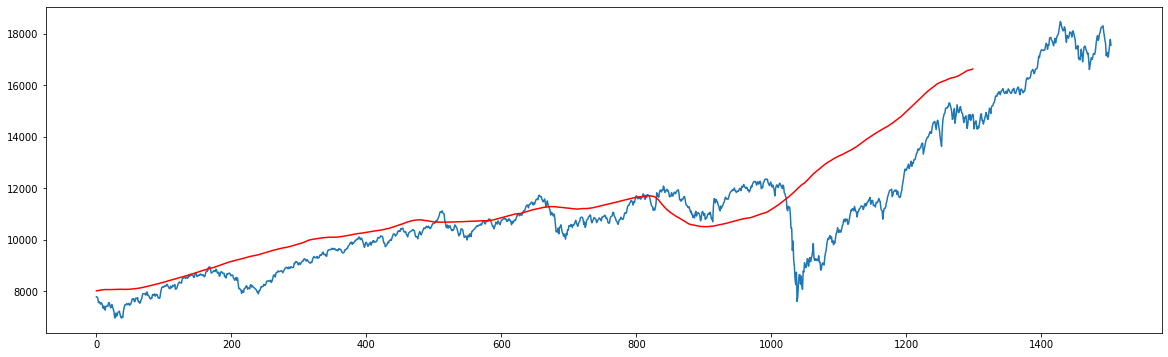

In [ ]:
#visualising two dataset

plt.figure(figsize =(20,6))
plt.plot(test_data.Close)
plt.plot(ema_list_200,'red')

In [ ]:
print(len(ema_list_200))
print(len(closing_list))

1299
1498


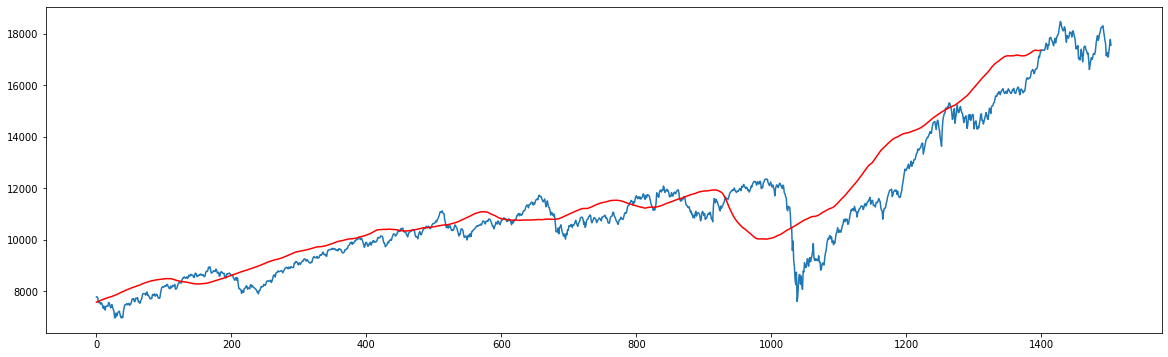

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(test_data.Close)
plt.plot(ema_list_100,'red')

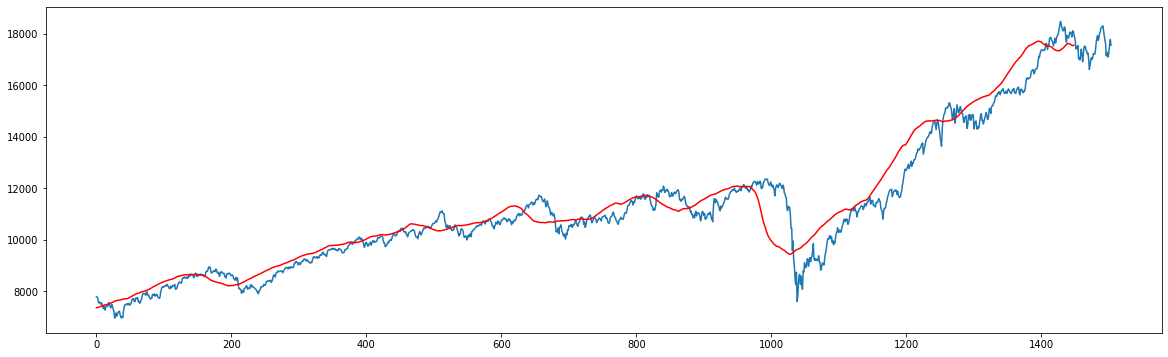

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(test_data.Close)
plt.plot(ema_list_50,'red')

In [ ]:
#Moving average convergenceDivergence
# value of (ema12-ema26)
#12 days ema 
smoothning_constant_12 = float(2/13)
#setting up variables
first_12_rows = test_data.loc[:11 , 'Close']
first_12_ema = float(sum(first_12_rows)/12)

In [ ]:
ema_list_12 = []
ema_list_12.append(first_12_ema)

for i in range(len(closing_list)-12):
  
  ema_12 = (closing_list[i+11]*smoothning_constant_12)+((ema_list_12[i])*(1-smoothning_constant_12))
  ema_list_12.append(ema_12)

print(ema_list_12)

[7573.654093583333, 7552.33809426282, 7514.947588222386, 7478.309467726634, 7469.715733460998, 7464.551759390075, 7460.428411791601, 7454.924025669817, 7471.635684028306, 7484.60714725472, 7480.136786907839, 7461.931097383556, 7453.018620863009, 7458.569617345624, 7447.59736852322, 7424.6131879811865, 7392.472727522542, 7328.453861442152, 7274.99175891259, 7257.7545952337305, 7225.523119043926, 7207.5118999602455, 7205.086992274054, 7205.958224231892, 7210.356928965447, 7194.848140663071, 7167.748456714907, 7137.4179399895365, 7120.853641529608, 7100.2684359096675, 7119.042492692795, 7157.474431970827, 7206.4168421291615, 7249.329650724675, 7285.632751382418, 7323.504605785123, 7348.52695904895, 7373.399764579881, 7398.8382623368225, 7408.340083208081, 7422.249301176069, 7436.141686379751, 7462.019903552097, 7499.286072236389, 7532.45743066156, 7560.771672098243, 7569.129891467744, 7573.417600472707, 7598.307230399983, 7619.859949107678, 7634.196850014189, 7653.366535396622, 7645.64863

In [ ]:
#26 days ema for moving average convergence divergence
smoothning_constant_26 = float(2/27)
#setting up variables
first_26_rows = test_data.loc[:25 , 'Close']
first_26_ema = float(sum(first_26_rows)/26)

In [ ]:
ema_list_26 = []
ema_list_26.append(first_26_ema)

for i in range(len(closing_list)-26):
  
  ema_26 = (closing_list[i+25]*smoothning_constant_26)+((ema_list_26[i])*(1-smoothning_constant_26))
  ema_list_26.append(ema_26)

print(ema_list_26)

[7488.7057167307685, 7474.594196602563, 7455.416863150522, 7419.930436102335, 7387.413381205865, 7370.786478523949, 7346.894887522176, 7329.232317705719, 7319.048442320111, 7311.026335481583, 7305.3614072977625, 7290.856844164595, 7270.697092374625, 7248.467685383912, 7232.266375355473, 7214.102184958771, 7214.709416072937, 7226.12724436383, 7244.606715003546, 7262.439558188469, 7278.9477246189535, 7297.677508350883, 7311.638426398966, 7326.346705554598, 7342.080282920924, 7350.859528482337, 7361.814378224386, 7372.97996539295, 7390.118493734213, 7413.387494198346, 7435.721746628098, 7456.520135766757, 7468.266799635886, 7477.80259225545, 7496.869081347639, 7514.760253247814, 7529.44836819242, 7546.437363511501, 7550.6420176958345, 7555.361134755402, 7554.70106514389, 7554.738037725824, 7563.379657301689, 7574.162660094156, 7594.6284034205155, 7618.337425018995, 7640.293912054625, 7660.423978198727, 7678.118483887711, 7691.224507673806, 7711.3300924387095, 7731.224152406213, 7739.81865

In [ ]:
del ema_list_12[:14]
print(ema_list_12)

[7447.59736852322, 7424.6131879811865, 7392.472727522542, 7328.453861442152, 7274.99175891259, 7257.7545952337305, 7225.523119043926, 7207.5118999602455, 7205.086992274054, 7205.958224231892, 7210.356928965447, 7194.848140663071, 7167.748456714907, 7137.4179399895365, 7120.853641529608, 7100.2684359096675, 7119.042492692795, 7157.474431970827, 7206.4168421291615, 7249.329650724675, 7285.632751382418, 7323.504605785123, 7348.52695904895, 7373.399764579881, 7398.8382623368225, 7408.340083208081, 7422.249301176069, 7436.141686379751, 7462.019903552097, 7499.286072236389, 7532.45743066156, 7560.771672098243, 7569.129891467744, 7573.417600472707, 7598.307230399983, 7619.859949107678, 7634.196850014189, 7653.366535396622, 7645.648636874064, 7640.833477047285, 7626.312972116933, 7615.372544868174, 7623.99213827307, 7637.062608538752, 7669.891467994328, 7707.554349072124, 7739.430603061028, 7765.987403359331, 7786.497003611741, 7797.043588440704, 7822.5214828344415, 7846.733547321451, 7846.813

In [ ]:
import numpy as np
MACD = np.array(ema_list_12) - np.array(ema_list_26)


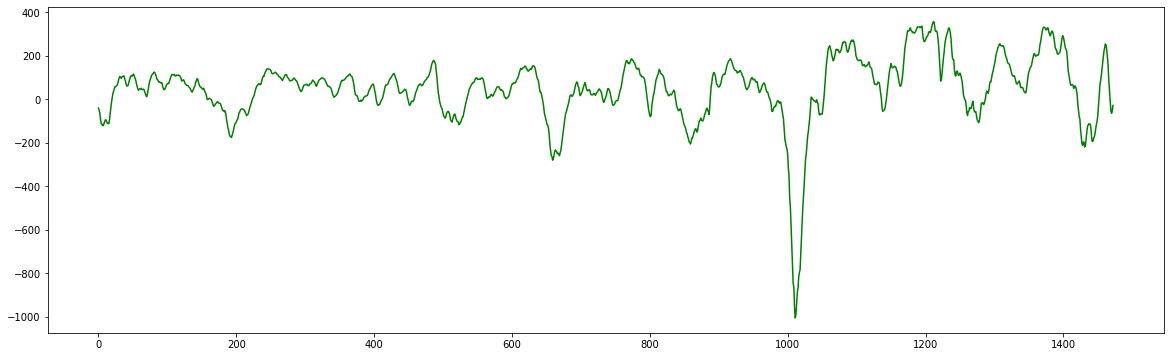

In [ ]:
plt.figure(figsize =(20,6))

plt.plot(MACD,'green')

In [ ]:
#creating low price data set
low_list = list(test_data.loc[:,'Low'])
low_list = [round(num , 3) for num in low_list]
#creating High price dataset
high_list = list(test_data.loc[:,'High'])
high_list = [round(num ,3) for num in high_list]

#creating empty dataset
lowest_list = []
highest_list = []

In [ ]:
#creating new list of values that are the lowest and the highest of 14 days so that it can be used in osscilator indicator 
low_high_list = []
for i in range(len(low_list)-14):
  lowest_list = low_list[i:i+14]
  highest_list = high_list[i:i+14]
  lowest_14 = min(lowest_list)
  highest_14 = min(highest_list)
  low_high_list.append([lowest_14,highest_14])
print(len(low_high_list))

1484


In [ ]:
for i in range(len(low_high_list)):
  if low_high_list[i][0] == low_high_list[i][1]:
    print('theres an issue')

In [ ]:
closing_list = [round(i , 3) for i  in closing_list]

#formula for osscilator
k_list = [] 
for i in range(len(low_high_list)):
  upper_k = (closing_list[i+13]-low_high_list[i][0])*100
  lower_k = (low_high_list[i][1] - low_high_list[i][0])*100
  percent_k = upper_k/lower_k if lower_k != 0 else 0
  k_list.append(percent_k)

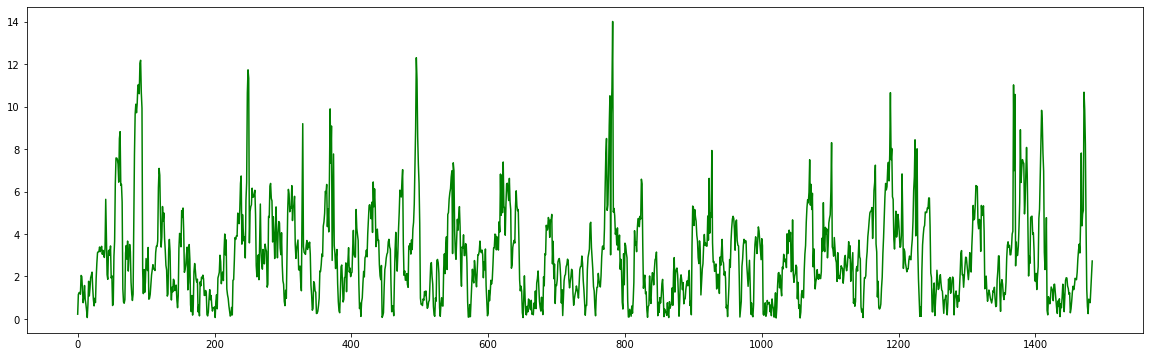

In [ ]:
#refining the data and putthing it into the occilstior list
stochastic_osscillator = []
for i in k_list:
  if i <= 100:
    stochastic_osscillator.append(i)
  else:
    stochastic_osscillator.append(100.00)

plt.figure(figsize =(20,6))

plt.plot(stochastic_osscillator,'green')

In [ ]:
#reforming the list so that we can make the dataframe accordingly 
#correct
closing_list = closing_list[199:]

In [ ]:
#correct
stochastic_osscillator = stochastic_osscillator[185:]

MACD = MACD[174:]

ema_list_50 = ema_list_50[150:]

ema_list_100 = ema_list_100[100:]

In [ ]:
print(len(ema_list_100) , len(ema_list_50) , len(MACD) , len(ema_list_200) , len(stochastic_osscillator) , len(closing_list))

1299 1299 1299 1299 1299 1299


## Concatenation of the dataset

In [ ]:
df1=pd.DataFrame(closing_list, columns=['Closing Price'])
df2=pd.DataFrame(ema_list_200, columns=['EMA200'])
df3=pd.DataFrame(ema_list_100, columns=['EMA100'])
df4=pd.DataFrame(ema_list_50, columns=['EMA50'])
df5=pd.DataFrame(MACD, columns=['MACD'])
df6=pd.DataFrame(stochastic_osscillator, columns=['S.O.'])
df7=pd.DataFrame(list(test_data.loc[199:,'Volume']), columns=['Volume'])
final_dataframe = pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=1)

final_dataframe = final_dataframe[:-1]

In [ ]:
# need to split the dataset into 3 standerd scaler module 

#first dataset contains first four columns 
first_dataset = pd.DataFrame(final_dataframe.loc[:,['Closing Price' , 'EMA200','EMA100', 'EMA50']])
scaler_1 = StandardScaler()
first_dataset = scaler_1.fit_transform(first_dataset)
#first_dataset

#scond dataset contains macd and so
second_dataset = pd.DataFrame(final_dataframe.loc[:,['MACD','S.O.']])
scaler_2 = StandardScaler()
second_dataset = scaler_2.fit_transform(second_dataset)
#second_dataset

#final dataset contains only one parmeter thus we need to transform the dataset into numpy reshape function 
third_dataset = pd.DataFrame(final_dataframe.loc[:,['Volume']])
third_dataset = np.array(third_dataset)
scaler_3 = StandardScaler()
third_dataset = scaler_3.fit_transform(third_dataset)

In [ ]:
#converting dataset into dataframe and concatinate it again for a full and final dataset 
first_dataframe = pd.DataFrame(first_dataset, columns = ['Closing Price','EMA200','EMA100','EMA50'])
second_dataframe = pd.DataFrame(second_dataset, columns = ['MACD','S.O.'])
third_dataframe = pd.DataFrame(third_dataset,columns = ['Volume'])

final_scaled_dataframe = pd.concat([first_dataframe,second_dataframe,third_dataframe] , axis=1)
final_scaled_dataframe

,Closing Price,EMA200,EMA100,EMA50,MACD,S.O.,Volume
0,-1.233110,-1.524092,-1.305063,-1.221838,-0.397592,-0.859999,-0.742511
1,-1.224230,-1.521178,-1.303962,-1.222532,-0.416891,-0.859999,-0.641066
2,-1.228816,-1.518181,-1.302683,-1.222828,-0.419359,-0.748584,-0.931588
3,-1.272634,-1.515272,-1.301533,-1.223304,-0.425764,-0.806128,-0.976914
4,-1.283974,-1.512943,-1.301392,-1.225589,-0.485147,-1.295647,-1.018787
...,...,...,...,...,...,...,...
1294,2.079717,2.711873,2.629357,2.480743,-0.387837,-1.013643,0.018544
1295,2.172583,2.714355,2.627167,2.473084,-0.633616,-1.025064,-0.155424
1296,2.265097,2.717983,2.627113,2.469602,-0.704088,-0.693770,-0.300469
1297,2.344398,2.722739,2.629143,2.470116,-0.636857,-0.363731,-0.021171


## Creating test and train dataset for the model 

### In this model we are going to predict next days price by looking into last 45 days price action along woth the help of trading indicators that we have created

In [ ]:
#making a conplex dataset with memory of 150 to lstm to remember as train_Y and train_X
final_scaled_dataframe = np.array(final_scaled_dataframe)
train_X = []
train_Y = []

n_future = 1
memory = 30
for i in range(memory , len(final_scaled_dataframe)-n_future+1):
  train_X.append(final_scaled_dataframe[i-memory:i , 0:final_scaled_dataframe.shape[1]])
  train_Y.append(final_scaled_dataframe[i+n_future-1:i+n_future ,0])

train_X , train_Y = np.array(train_X) , np.array(train_Y)

print(train_X.shape ,train_Y.shape)

(1269, 30, 7) (1269, 1)


In [ ]:
test_X = np.array(train_X[len(train_X)-23:])
train_X = np.array(train_X[:len(train_X)-23])
test_Y = np.array(train_Y[len(train_Y)-23:])
trian_Y = np.array(train_Y[:len(train_Y)-23])

# Creating the LSTM model form keras 

I am not sure that someone has made such complex structure for stock prediction thus this is first time someone has made this in my knowledge .All I hope is this to work 

In [ ]:
price = Input(shape = (train_X.shape[1],1), name = ' cp')
ema200 = Input(shape = (train_X.shape[1],1), name = 'ema2')
ema100 = Input(shape = (train_X.shape[1],1), name = 'ema1')
ema50 = Input(shape = (train_X.shape[1],1), name = 'ema5')
macd = Input(shape = (train_X.shape[1],1), name = 'macd')
so = Input(shape = (train_X.shape[1],1), name = 'so')
volume = Input(shape = (train_X.shape[1],1), name = 'vol')

pricelayer = LSTM( 30 ,activation = 'relu' )(price)

ema200layer = LSTM( 30 ,activation = 'relu' )(ema200)

ema100layer = LSTM( 30 ,activation = 'relu' )(ema100)

ema50layer = LSTM( 30 ,activation = 'relu')(ema50)

macdlayer = LSTM( 30 ,activation = 'relu' )(macd)

solayer = LSTM( 30 ,activation = 'relu' )(so)

volumelayer = LSTM( 30 ,activation = 'relu' )(volume)


output_layer = concatenate([
                           pricelayer,
                            ema200layer,
                            ema100layer,
                            ema50layer,
                            macdlayer,
                            solayer,
                            volumelayer                 
  ])
output = Dense(train_Y.shape[1] , activation = 'linear')(output_layer)

model_spm_3 = Model(
                inputs = [price,
                          ema200,
                          ema100,
                          ema50,
                          macd,
                          so,
                          volume],
                outputs = output
  )

In [ ]:
model_spm_3.compile(optimizer='rmsprop'  ,loss = 'mse')

In [ ]:
model_spm_3.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
 cp (InputLayer)                [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
ema2 (InputLayer)               [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
ema1 (InputLayer)               [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
ema5 (InputLayer)               [(None, 30, 1)]      0                                            
____________________________________________________________________________________________

In [ ]:
history = model_spm_3.fit([
                          train_X[:,:,0],train_X[:,:,1],train_X[:,:,2],train_X[:,:,3],
                          train_X[:,:,4],train_X[:,:,5],train_X[:,:,6]],
                         [train_Y] ,
                         epochs = 20,
                         batch_size = 8,
                         validation_split = 0.1,
                         verbose = 1)

Epoch 1/20
141/141 [==============================] - 9s 31ms/step - loss: 0.0497 - val_loss: 0.8519
Epoch 2/20
141/141 [==============================] - 4s 29ms/step - loss: 0.0091 - val_loss: 0.0160
Epoch 3/20
141/141 [==============================] - 4s 30ms/step - loss: 0.0075 - val_loss: 0.0449
Epoch 4/20
141/141 [==============================] - 4s 31ms/step - loss: 0.0071 - val_loss: 0.0240
Epoch 5/20
141/141 [==============================] - 5s 32ms/step - loss: 0.0063 - val_loss: 0.0634
Epoch 6/20
141/141 [==============================] - 5s 36ms/step - loss: 0.0056 - val_loss: 0.0092
Epoch 7/20
141/141 [==============================] - 5s 37ms/step - loss: 0.0054 - val_loss: 0.0101
Epoch 8/20
141/141 [==============================] - 5s 32ms/step - loss: 0.0049 - val_loss: 0.0537
Epoch 9/20
141/141 [==============================] - 5s 33ms/step - loss: 0.0048 - val_loss: 0.0099
Epoch 10/20
141/141 [==============================] - 5s 36ms/step - loss: 0.0041 - val_lo

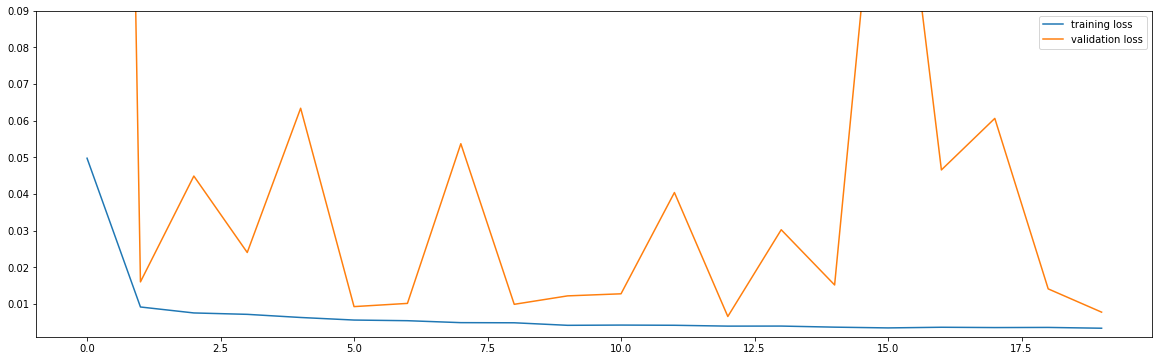

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(history.history['loss'] , label = 'training loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
plt.ylim(0.001,0.09)
plt.legend()

## Testing the model

In [ ]:
Y_predict = model_spm_3.predict([test_X[:,:,0],test_X[:,:,1],test_X[:,:,2],test_X[:,:,3],test_X[:,:,4],test_X[:,:,5],test_X[:,:,6]])

In [ ]:
#getting the original values
future_copies = np.repeat(Y_predict , 4 , axis = 1)
future_copies.shape
Y_predict_future = scaler_1.inverse_transform(future_copies)[:,0]

In [ ]:
print(Y_predict_future)

[17447.213 17641.125 17823.568 17955.422 17892.023 17886.643 18034.69
 18139.111 18187.871 18248.717 18262.96  18338.32  18240.736 18120.158
 17931.348 17736.424 17442.984 17498.314 17496.96  17499.81  17640.346
 17853.512 18053.967]


In [ ]:
original = list(final_dataframe.loc[:,'Closing Price'])

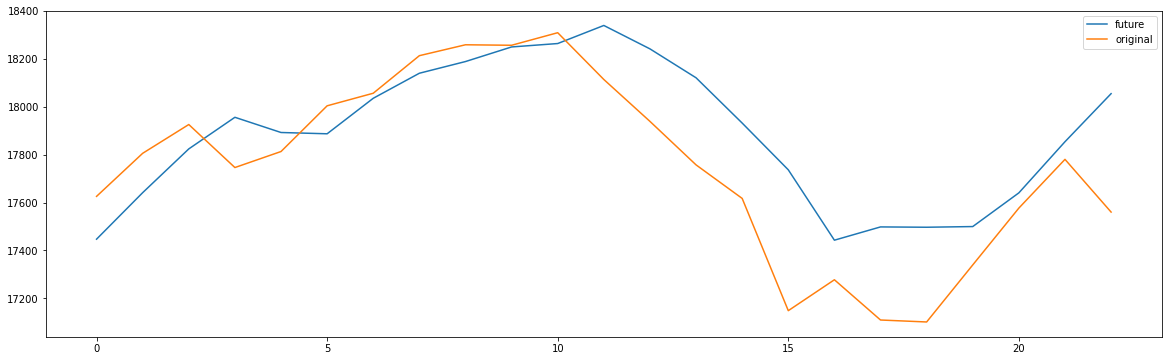

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(Y_predict_future , label = 'future')
plt.plot(original[len(original)-len(Y_predict_future):], label = 'original')

plt.legend()